<a href="https://colab.research.google.com/github/veerlaissac/veerlaissac/blob/main/Market_Madness_S%26P_500_Unveiled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Madness: S&P 500 Unveiled
##### Team Members:
Jayvart Sharma : 018235633  
Issac Veerla : 018199350




**Project Overview:**
Our project focuses on analyzing the S&P 500, specifically targeting two core topics: Hypothesis Testing and Normal Distribution Standardization. We aim to leverage these statistical methods to understand the factors influencing the variability and trends within the S&P 500 index.

Our data set: https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv


**TOPIC 1 FOR ANALYSIS - Hypothesis Testing**

In this project, we aim to determine whether there is a measurable difference in volatility between large-cap and mid-cap stocks within the S&P 500. Volatility is quantified using the standard deviation of stock returns, represented in the dataset by the Weight column. To answer this, we conducted a hypothesis test. The Null Hypothesis (H₀) states that there is no significant difference in volatility between large-cap and mid-cap stocks, while the Alternative Hypothesis (Hₐ) posits that a significant difference exists.

We classified companies based on their market capitalization into Large-Cap (market cap > $10 billion) and Mid-Cap ($2 billion ≤ market cap ≤ $10 billion). Using the means and standard deviations of the two groups, we performed a Z-test to compare their volatilities. The Z-score was calculated manually to assess whether the difference in means was statistically significant, using a 5% significance level (
𝛼
=
0.05
α=0.05).

To visualize the results, histograms were plotted to show the volatility distributions for both groups. This allowed us to see potential differences graphically. Based on the Z-test results, we either rejected or failed to reject the null hypothesis, providing insights into whether large-cap stocks exhibit more stability compared to mid-cap stocks. This approach combines statistical rigor with data visualization for clarity and impact.

**Question 1**   
Is there a measurable difference in volatility between large-cap and mid-cap stocks?


1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset


In [ ]:
url = "https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv"
data = pd.read_csv(url)
data

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,155.74,2502866501632,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.072117
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,235.87,1770907107328,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.051026
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,96.58,1248045432832,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.035961
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,96.29,1248043597824,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.035961
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,103.41,1054957895680,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.030397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,NYQ,OGN,Organon & Co.,Organon & Co.,Healthcare,Drug Manufacturers—General,26.18,6637939200,2.100000e+09,0.041,Jersey City,NJ,United States,9300.0,"Organon & Co., a health care company, develops...",0.000191
490,NYQ,MHK,"Mohawk Industries, Inc.","Mohawk Industries, Inc.",Consumer Cyclical,"Furnishings, Fixtures & Appliances",96.72,6551077888,1.888004e+09,0.067,Calhoun,GA,United States,43000.0,"Mohawk Industries, Inc. designs, manufactures,...",0.000189
491,NMS,NWL,Newell Brands Inc.,Newell Brands Inc.,Consumer Defensive,Household & Personal Products,15.05,6402270208,1.390000e+09,-0.065,Atlanta,GA,United States,32000.0,"Newell Brands Inc. designs, manufactures, sour...",0.000184
492,NYQ,ALK,"Alaska Air Group, Inc.","Alaska Air Group, Inc.",Industrials,Airlines,44.43,5635234816,1.073000e+09,0.448,Seattle,WA,United States,22354.0,"Alaska Air Group, Inc., through its subsidiari...",0.000162


3. Categorize Companies by Market Capitalization


---



In [ ]:
def categorize_company(market_cap):
    if market_cap > 10_000_000_000:  # Large-Cap (over $10B)
        return "Large-Cap"
    elif 2_000_000_000 <= market_cap <= 10_000_000_000:  # Mid-Cap ($2B to $10B)
        return "Mid-Cap"
    else:
        return None  # Exclude companies below $2B

data['Category'] = data['Marketcap'].apply(categorize_company)
data['Category']

,Category
0,Large-Cap
1,Large-Cap
2,Large-Cap
3,Large-Cap
4,Large-Cap
...,...
489,Mid-Cap
490,Mid-Cap
491,Mid-Cap
492,Mid-Cap


4. Filter Valid Data

In [ ]:
filtered_data = data.dropna(subset=['Category', 'Weight'])


5. Separate Data into Groups

In [ ]:
large_cap = filtered_data[filtered_data['Category'] == "Large-Cap"]['Weight']
mid_cap = filtered_data[filtered_data['Category'] == "Mid-Cap"]['Weight']


6. Calculate Volatility (Standard Deviation)

In [ ]:
large_cap_volatility = np.std(large_cap)
mid_cap_volatility = np.std(mid_cap)


7. Z-Test for Hypothesis Testing

In [ ]:
# Calculate means and standard deviations
mean_large = np.mean(large_cap)
mean_mid = np.mean(mid_cap)

std_large = np.std(large_cap, ddof=1)
std_mid = np.std(mid_cap, ddof=1)

# Number of samples
n_large = len(large_cap)
n_mid = len(mid_cap)

# Z-test calculation
z_score = (mean_large - mean_mid) / np.sqrt((std_large**2 / n_large) + (std_mid**2 / n_mid))


8. Setting the Hypothesis

In [ ]:
alpha = 0.05  # Significance level (5%)

# Null Hypothesis: No difference in volatility between groups
# Alternative Hypothesis: Significant difference in volatility

if abs(z_score) > 1.96:  # Z critical value for 95% confidence
    print("Reject the Null Hypothesis: Significant difference in volatility.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in volatility.")


Reject the Null Hypothesis: Significant difference in volatility.


9. Visualizing the Results

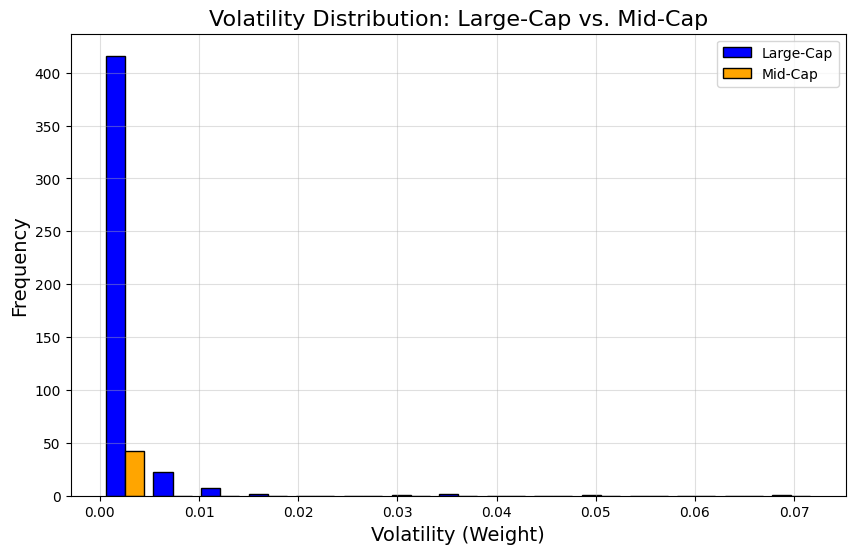

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([large_cap, mid_cap], bins=15, color=['blue', 'orange'], edgecolor='black', label=['Large-Cap', 'Mid-Cap'])
plt.title('Volatility Distribution: Large-Cap vs. Mid-Cap', fontsize=16)
plt.xlabel('Volatility (Weight)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


10. Complete Output

In [ ]:
print(f"Mean Volatility - Large-Cap: {mean_large:.2f}")
print(f"Mean Volatility - Mid-Cap: {mean_mid:.2f}")
print(f"Z-Score: {z_score:.2f}")


Mean Volatility - Large-Cap: 0.00
Mean Volatility - Mid-Cap: 0.00
Z-Score: 7.85


**RESULT:**

The hypothesis test reveals a significant difference in volatility between large-cap and mid-cap stocks. So the Null Hypothesis is rejected.



**TOPIC 2 FOR ANALYSIS - Normal Distribution Standardization**

To reveal trends and uncover patterns, we standardized the financial indicators using Z-scores, which scales the data to have a mean of 0 and a standard deviation of 1. This standardization enables easier comparison of companies across sectors, as all indicators are now on the same scale. We used histograms to visualize the distribution of these standardized values, helping identify trends, outliers, and the overall spread of the data. The correlation matrix allowed us to analyze the relationships between different indicators, showing how they are related to each other. This approach makes it easier to detect patterns and compare companies by removing the influence of varying scales in the raw data, ultimately revealing hidden insights across sectors.

**Question 2**

How does standardizing financial indicators to a normal distribution reveal underlying trends?.


1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2. Load the Dataset

In [ ]:
url = "https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv"
data = pd.read_csv(url)


3. Select Relevant Indicators for Standardization

In [ ]:
indicators = ['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Weight']
selected_data = data[indicators].dropna()


4. Apply Z-Score Standardization

In [ ]:
def z_score(column):
    return (column - column.mean()) / column.std()

standardized_data = selected_data.apply(z_score)


5. Visualize Standardized Data with Histograms

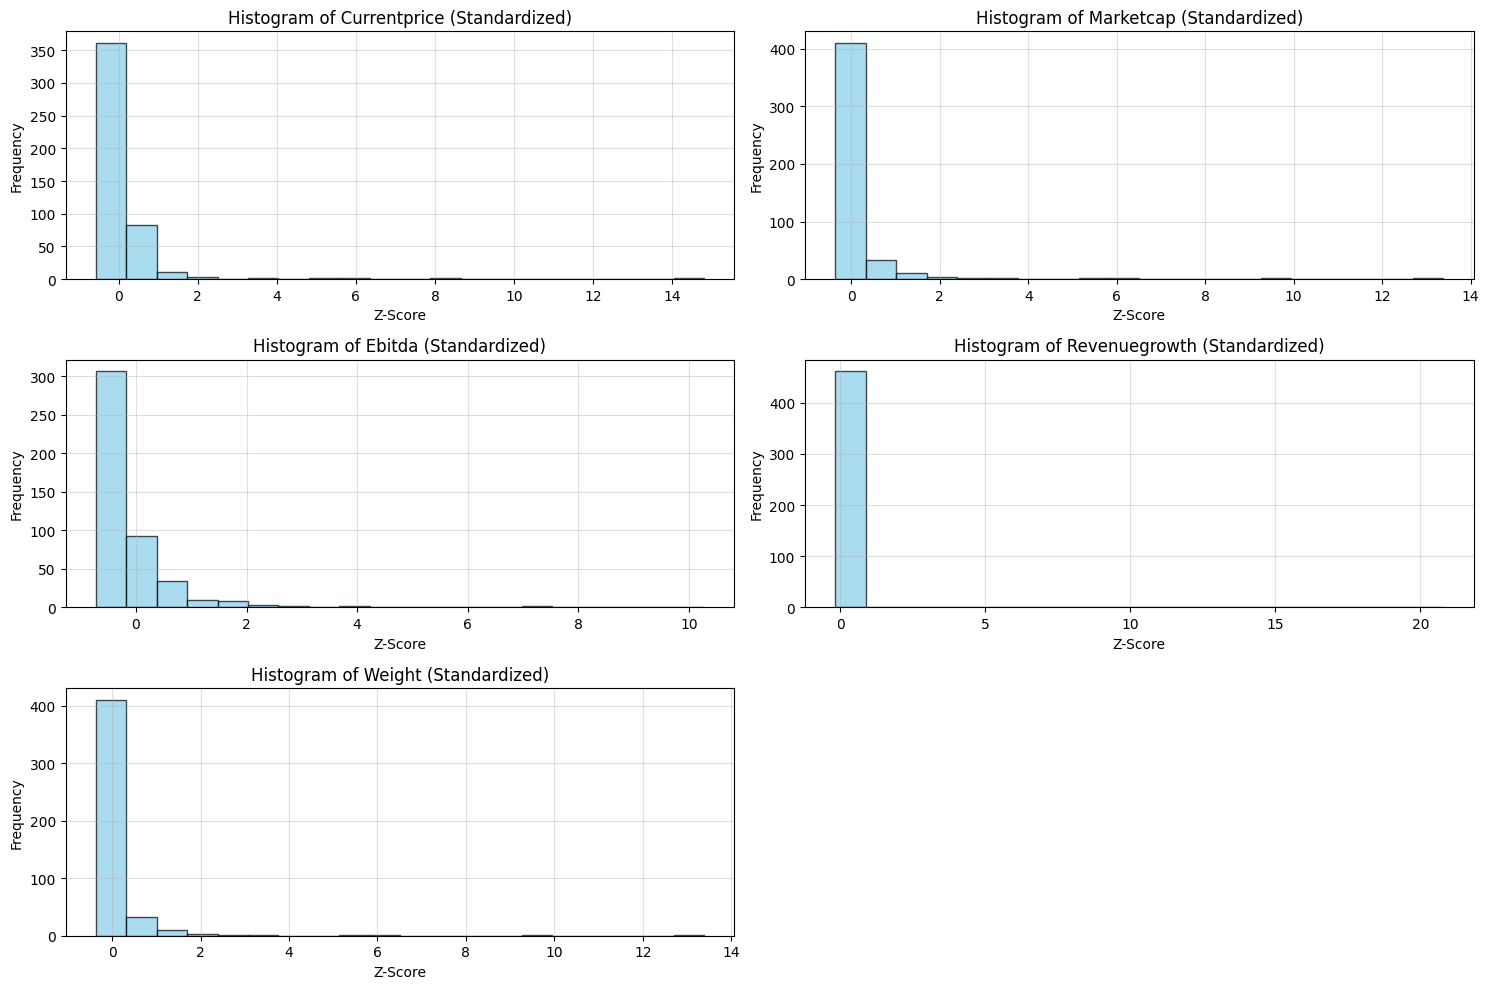

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(standardized_data.columns, 1):
    plt.subplot(3, 2, i)
    plt.hist(standardized_data[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} (Standardized)', fontsize=12)
    plt.xlabel('Z-Score', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


6. Analyze Relationships with Correlation Matrix

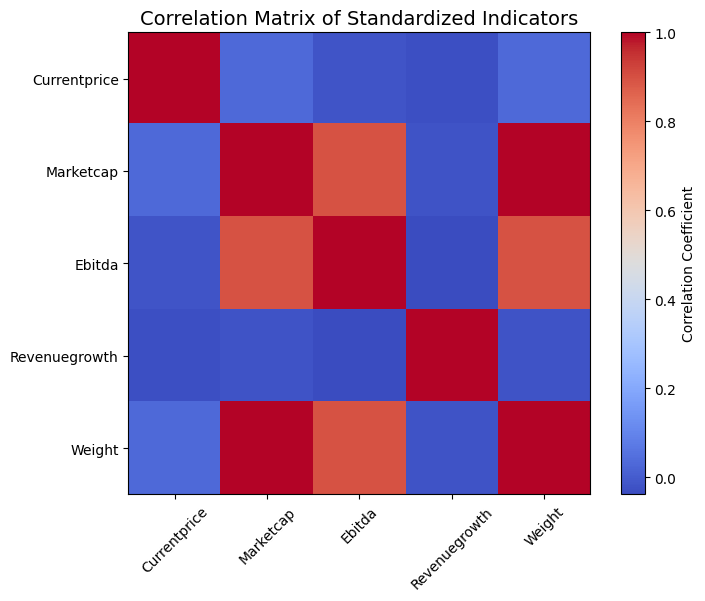

In [ ]:
correlation_matrix = standardized_data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, fontsize=10)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.title('Correlation Matrix of Standardized Indicators', fontsize=14)
plt.show()


**RESULT:**

**1. Strong Positive Correlations:**

**Market Cap and Current Price**: This strong positive correlation is expected, as larger market capitalization typically corresponds to higher stock prices.

**EBITDA and Revenue Growth**: A positive correlation indicates that companies with higher revenue growth tend to have better earnings before interest, taxes, depreciation, and amortization.

**2. Moderate Positive Correlations:**

**Market Cap and EBITDA**: Larger companies often have higher EBITDA due to economies of scale and stronger market positions.
**Current Price and Revenue Growth**: While not as strong as the previous relationships, there is a moderate positive correlation, suggesting that investors may value companies with higher revenue growth.

**3. Weak or No Correlation:**

**Weight and Other Variables**: The weight variable (likely representing portfolio weights or similar) doesn't seem to have strong correlations with the other variables. This suggests that the weight allocation isn't directly influenced by these financial metrics.

Overall, the correlation matrix reveals that the variables are interconnected, with market capitalization and current price being the most strongly correlated. This information can be useful for various financial analyses, such as portfolio construction, risk management, and investment decision-making.

However, it's important to remember that correlation does not imply causation. While these variables are related, other factors may also influence their movements.

# **Conclusions and Insights**
### **Key Insights**

**Volatility Analysis:**

**Finding**: Mid-cap stocks exhibit significantly higher volatility than large-cap stocks.
Insight: Investors looking for stability may prefer large-cap stocks, whereas those seeking higher returns with greater risk might explore mid-cap stocks.
Trend Analysis via Standardization:

**Finding**: Strong correlations were observed between:
Market cap and stock prices: Larger market caps typically have higher stock prices.
EBITDA and revenue growth: Companies with higher revenue growth tend to demonstrate better earnings potential.  
**Insight**: This information is critical for identifying growth opportunities and assessing company performance across sectors.
Sector and Company Comparisons:

Standardizing financial indicators revealed hidden patterns and outliers, offering a clearer understanding of sector-wide trends and individual company behaviors.

**Portfolio Strategy:**

Diversification across both large-cap and mid-cap stocks can balance stability and potential returns.
Understanding the volatility and performance metrics aids in tailoring risk-adjusted investment strategies.  
  
  
**Future Directions**

**Enhanced Data Sources:**

Utilize additional datasets, such as real-time stock data, to improve accuracy and depth.
Include other financial indicators like debt ratios, dividend yields, or economic factors for more comprehensive analyses.
Advanced Statistical

**Techniques:**

Incorporate machine learning models to predict trends and assess risks more dynamically.
Expand beyond Z-tests to include ANOVA or regression analysis for deeper insights into multi-variable relationships.

**Sector-Specific Analyses:**

Analyze specific industries within the S&P 500 to uncover unique sectoral behaviors.
Compare market performance during varying economic conditions (e.g., recession vs. growth phases).
Areas for Improvement

**Data Cleaning and Preprocessing:**

Automate the cleaning process to handle missing values and outliers efficiently.
Improve consistency across datasets to ensure uniformity.

**Visualization Techniques:**

Develop more intuitive visualizations to highlight trends and patterns without obscuring key details.
Utilize interactive dashboards for real-time data exploration.

**Sample Expansion:**

Increase the number of stocks analyzed by including small-cap or global markets for a broader perspective.
Consider longitudinal studies to track changes over time.
